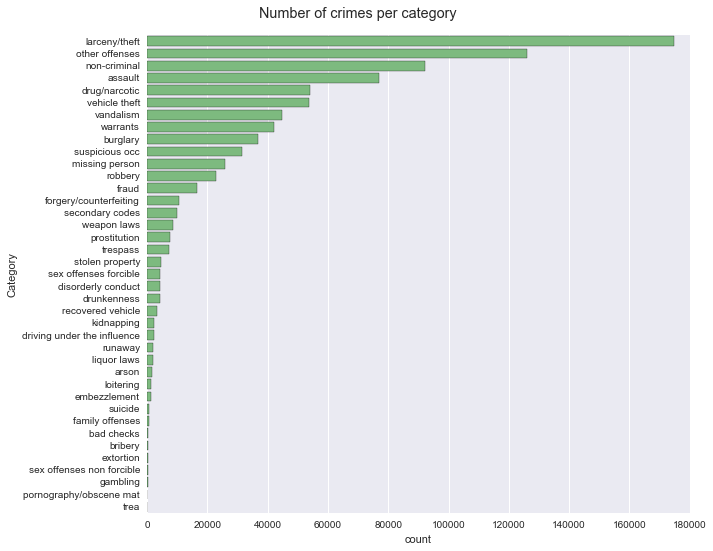

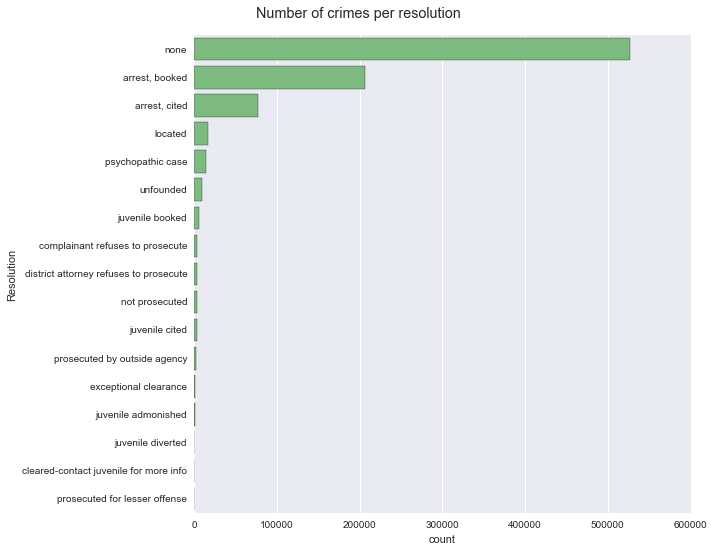

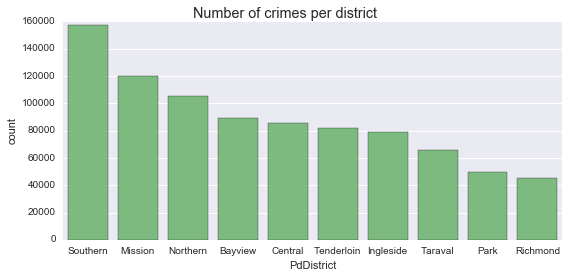

In [112]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
sns.set_palette("Greens", n_colors=1)

#train = pd.read_csv(r'D:\Dropbox\16 Winter\TIM245\Project\train.csv', sep = ';', parse_dates=['Dates']);
address = r'D:\Dropbox\16 Winter\TIM245\Project\train.csv'
address2 = r'D:\Dropbox\16 Winter\TIM245\Project\test.csv'

train = pd.read_csv(address, parse_dates=['Dates'])

#print train

train.Category = train.Category.str.lower()
train.Resolution = train.Resolution.str.lower()
train.Descript = train.Descript.str.lower()
train.PdDistrict = train.PdDistrict.str.capitalize()
# new column for statistics by years
train['Year'] = train['Dates'].map(lambda x: x.year).astype(int)
train['Hour'] = train['Dates'].map(lambda x: x.hour).astype(int)

hours = train.Hour.unique()
hours.sort()

districts = train['PdDistrict'].unique()
districts.sort()

#print train

# list of days will be helpful for sorting
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

f = plt.figure(figsize=(10,8))
sns.countplot(palette = sns.color_palette(), y="Category", data=train, order=train.Category.value_counts().index)
f.tight_layout()
st = f.suptitle('Number of crimes per category', fontsize="x-large")
st.set_y(0.95)
f.subplots_adjust(top=0.9)
f.savefig('Number of crimes per category.png')

f = plt.figure(figsize=(10,8))
sns.countplot(palette = sns.color_palette(), y="Resolution", data=train, order=train.Resolution.value_counts().index)
f.tight_layout()
st = f.suptitle('Number of crimes per resolution', fontsize="x-large")
st.set_y(0.95)
f.subplots_adjust(top=0.9)
f.savefig('Number of crimes per resolution.png')

f = plt.figure(figsize=(8,4))
sns.countplot(palette = sns.color_palette(), x="PdDistrict", data=train,  order=train.PdDistrict.value_counts().index)
f.tight_layout()
st = f.suptitle('Number of crimes per district', fontsize="x-large")
st.set_y(0.95)
f.subplots_adjust(top=0.9)
f.savefig('Number of crimes per district.png')

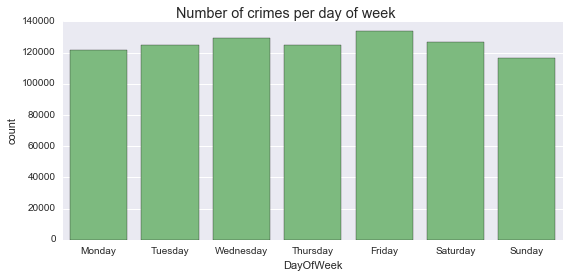

In [91]:
f = plt.figure(figsize=(8,4))
sns.countplot(palette = sns.color_palette(),x="DayOfWeek", data=train, order=week_days)
f.tight_layout()
st = f.suptitle('Number of crimes per day of week', fontsize="x-large")
st.set_y(0.95)
f.subplots_adjust(top=0.9)
f.savefig('Number of crimes per day of week.png')

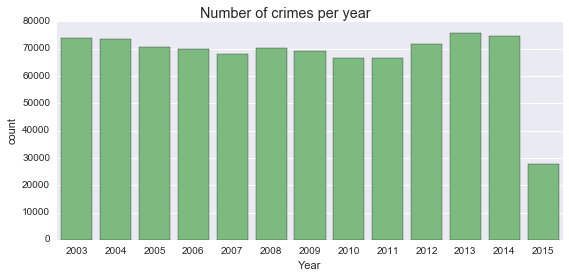

In [92]:
years = train.Year.unique()
years.sort()
f = plt.figure(figsize=(8,4))
sns.countplot(palette = sns.color_palette(), x="Year", data=train, order=years)
f.tight_layout()
st = f.suptitle('Number of crimes per year', fontsize="x-large")
st.set_y(0.95)
f.subplots_adjust(top=0.9)
f.savefig('Number of crimes per year.png')

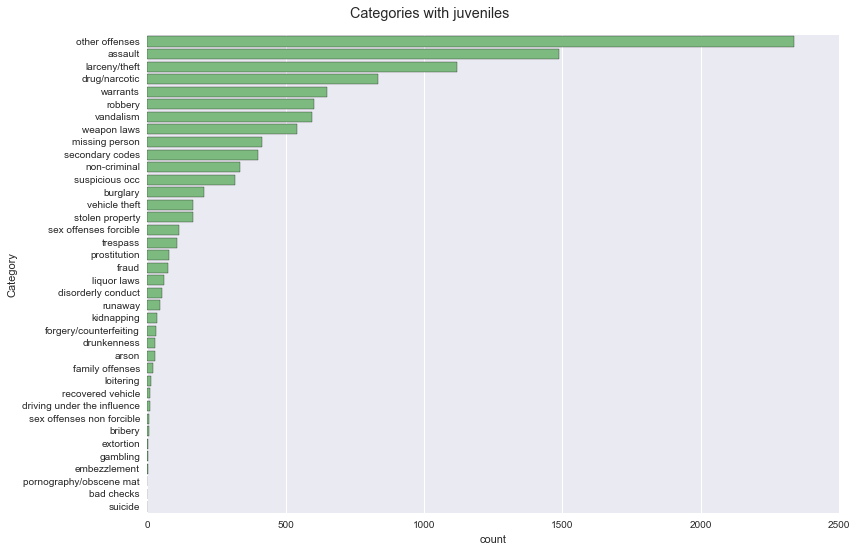

In [93]:
train['Juvenile'] = (train.Resolution.str.find('juvenile') != -1).astype(int)
f = plt.figure(figsize=(12,8))
df = train[train.Juvenile == 1]
sns.countplot(palette = sns.color_palette(), y="Category", data=df, order=df.Category.value_counts().index)
f.tight_layout()
st =  f.suptitle('Categories with juveniles', fontsize="x-large")
st.set_y(0.95)
f.subplots_adjust(top=0.9)
f.savefig('Categories with juveniles.png')

In [94]:
categories = {
    'thefts' : ['larceny/theft', 'robbery', 'burglary','stolen property'],
    'money offences' : ['bribery', 'extortion', 'gambling', 'embezzlement'],
    'fraud' : ['fraud', 'forgery/counterfeiting', 'bad checks'],
    'health danger' : ['assault', 'family offenses', 'kidnapping', 'missing person', 'suicide', 'arson'],
    'drugs' : ['drug/narcotic', 'driving under the influence', 'drunkenness', 'liquor laws'],
    'sex offences' : ['sex offenses forcible', 'sex offenses non forcible', 'pornography/obscene mat', 'prostitution'],
    'vehicles' : ['vehicle theft', 'recovered vehicle'],
    'disorderly conduct' : ['vandalism', 'trespass',  'disorderly conduct', 'loitering', 'suspicious occ'],
    'other' : ['other offenses', 'non-criminal', 'warrants', 'secondary codes', 'runaway', 'weapon laws']
}

In [95]:
def plot_count_of(categories, sup_category, column, labels_in_order):
    lst = categories[sup_category];
    ax = list()        
    f, ax = plt.subplots(1, len(lst), figsize=(max(len(lst) * 5, 6) , 4))
    order = list()
    for idx,category in enumerate(lst):
        df = train[train.Category==category]
        sns.countplot(x=column, 
                data=df, 
                order=labels_in_order,
                ax = ax[idx],
                palette = sns.color_palette())
        ax[idx].set_xticklabels(labels_in_order, rotation=90)
        ax[idx].set_title(category)
    f.tight_layout()
    st = f.suptitle('Number of crimes per ' + column +' ('+ sup_category + ')', fontsize="x-large")
    st.set_y(0.95)
    f.subplots_adjust(top=0.85)
    f.savefig('Number of crimes per ' + column +' ('+ sup_category + ').png')

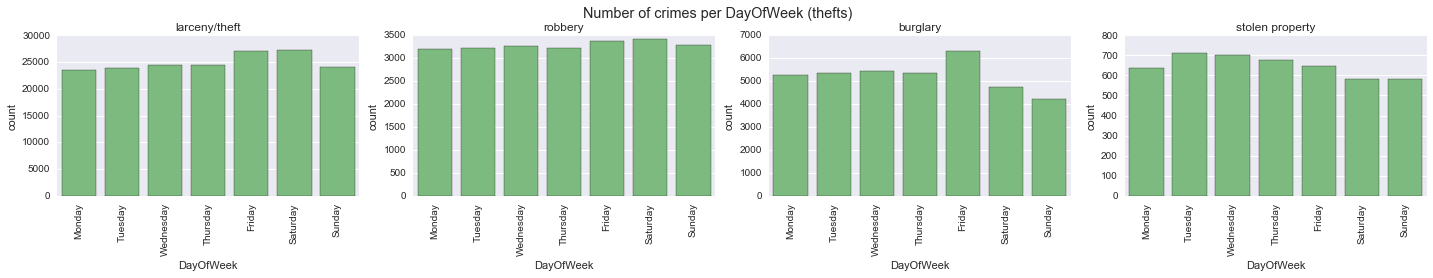

In [96]:
plot_count_of(categories, 'thefts', 'DayOfWeek', week_days)

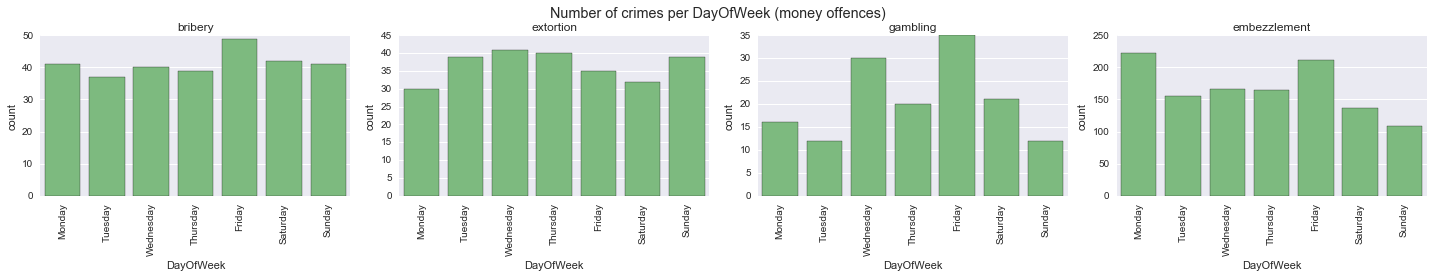

In [97]:
plot_count_of(categories, 'money offences', 'DayOfWeek', week_days)

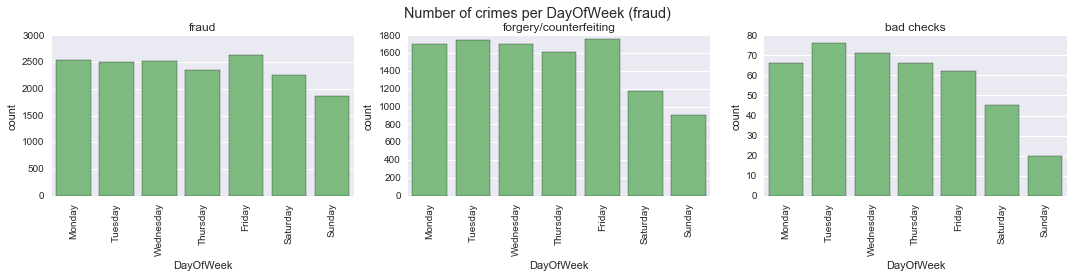

In [98]:
plot_count_of(categories, 'fraud', 'DayOfWeek', week_days)

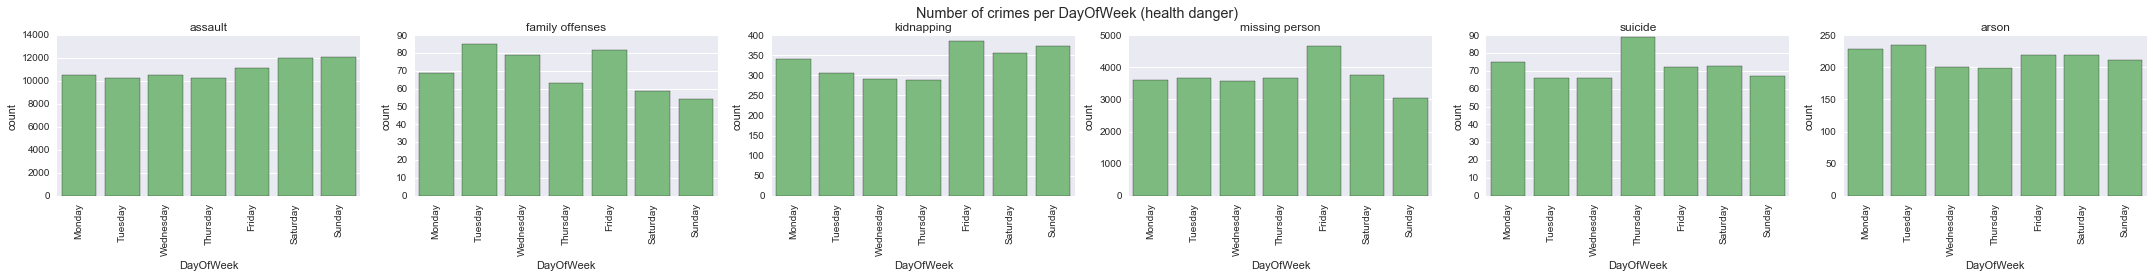

In [99]:
plot_count_of(categories, 'health danger', 'DayOfWeek', week_days)

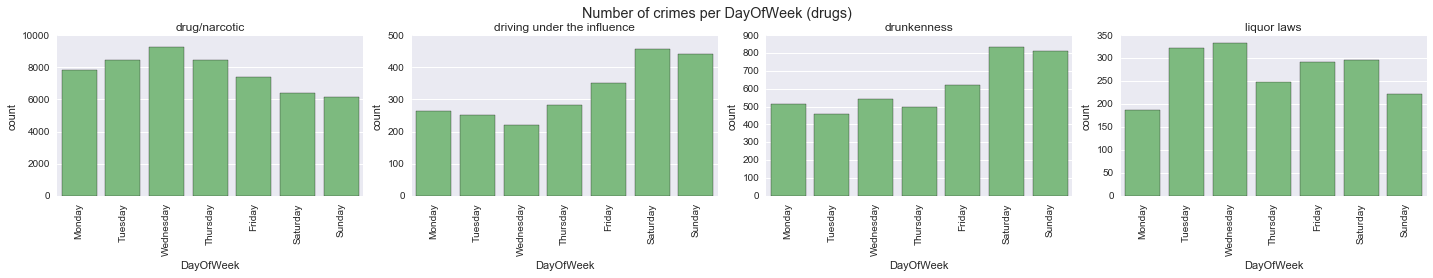

In [100]:
plot_count_of(categories, 'drugs', 'DayOfWeek', week_days)

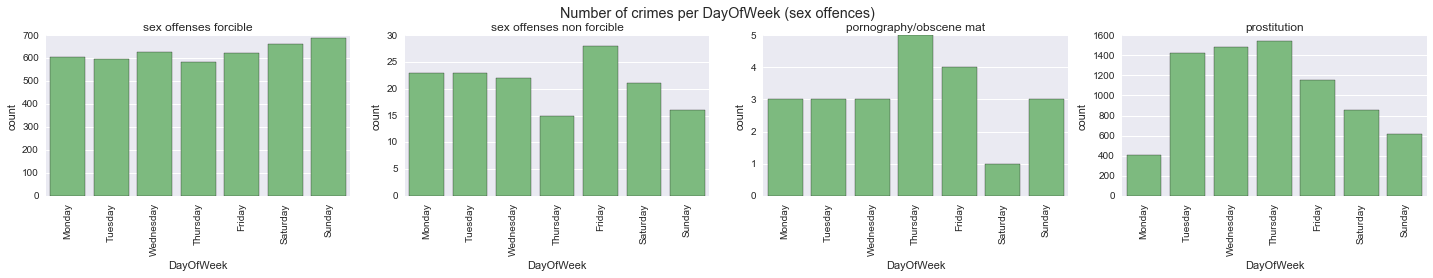

In [101]:
plot_count_of(categories, 'sex offences', 'DayOfWeek', week_days)

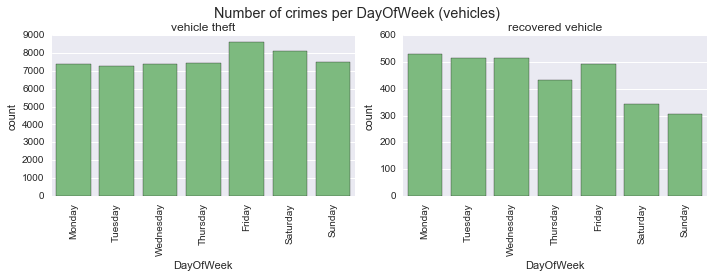

In [102]:
plot_count_of(categories, 'vehicles', 'DayOfWeek', week_days)

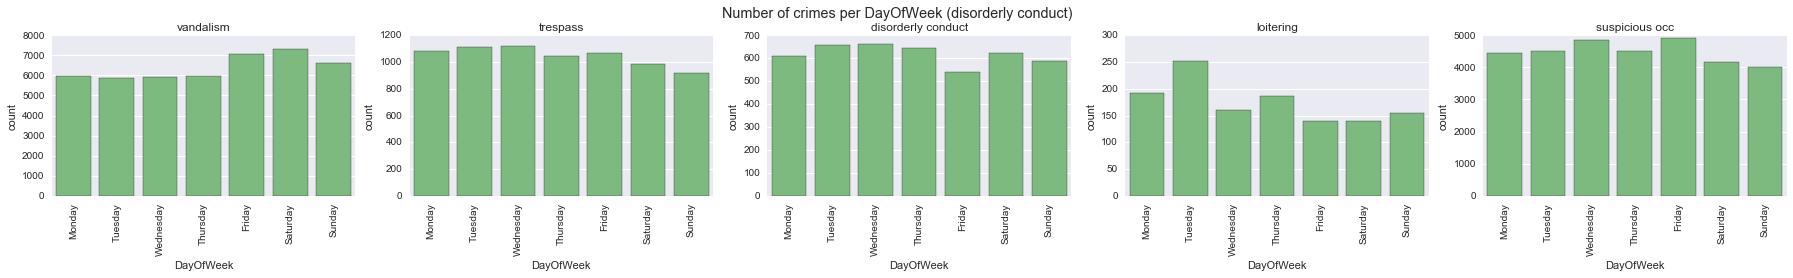

In [103]:
plot_count_of(categories, 'disorderly conduct', 'DayOfWeek', week_days)

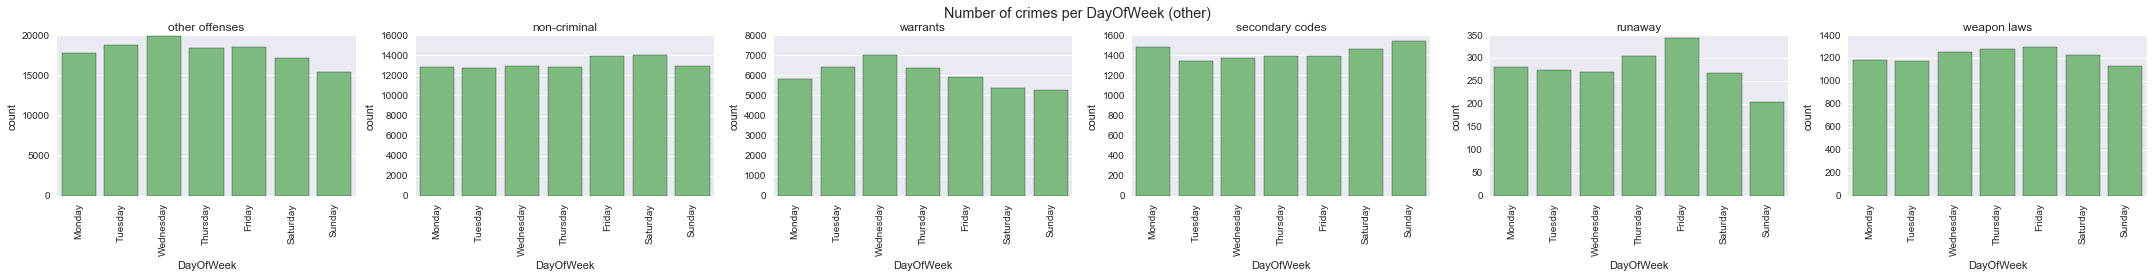

In [104]:
plot_count_of(categories, 'other', 'DayOfWeek', week_days)

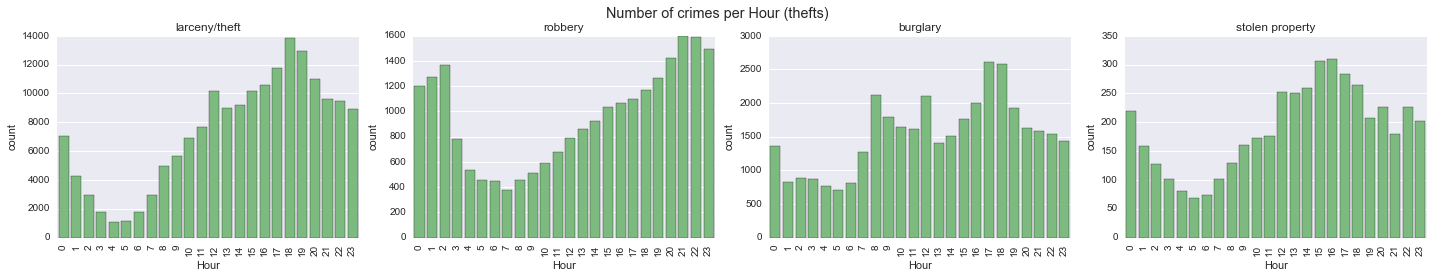

In [105]:
plot_count_of(categories, 'thefts', 'Hour', hours)

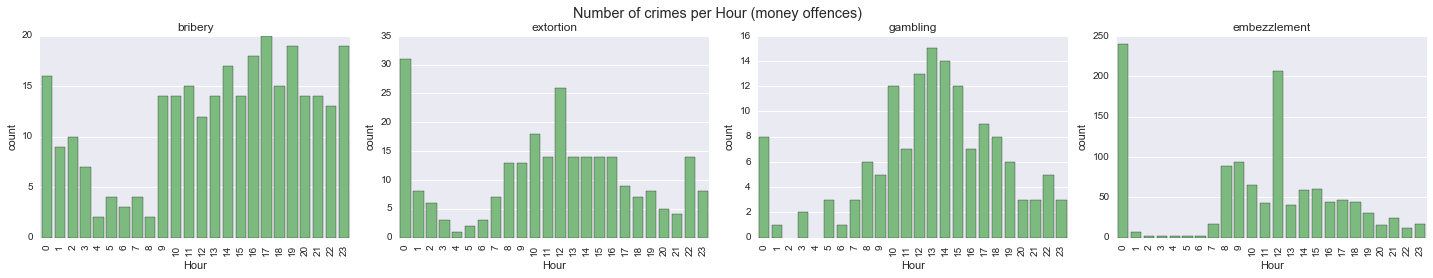

In [106]:
plot_count_of(categories, 'money offences', 'Hour', hours)

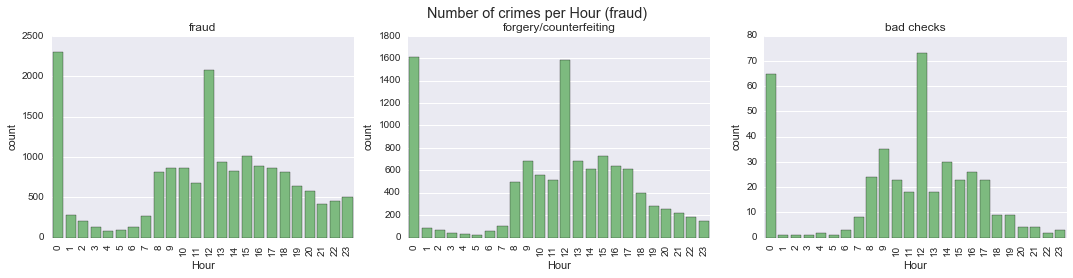

In [107]:
plot_count_of(categories, 'fraud', 'Hour', hours)

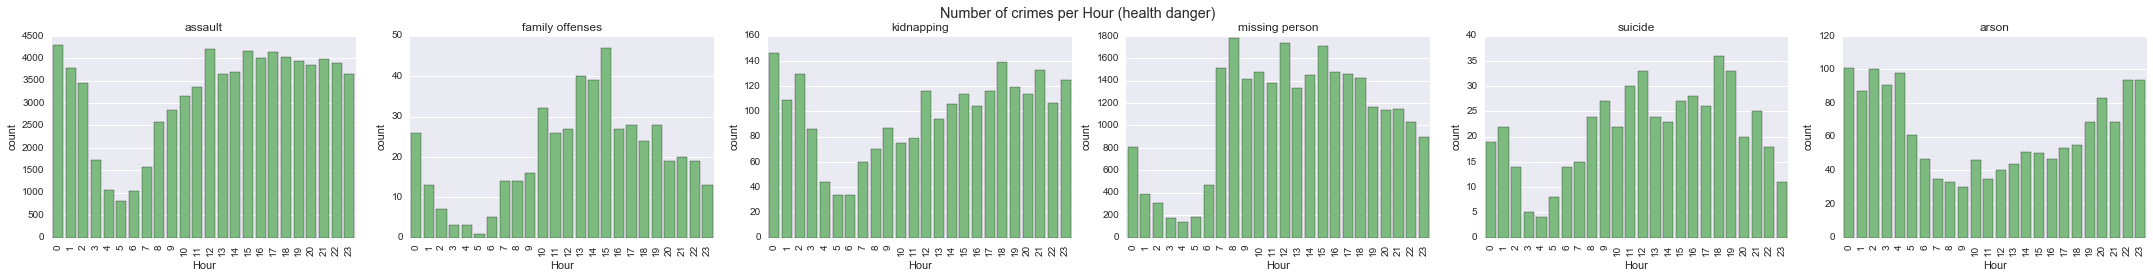

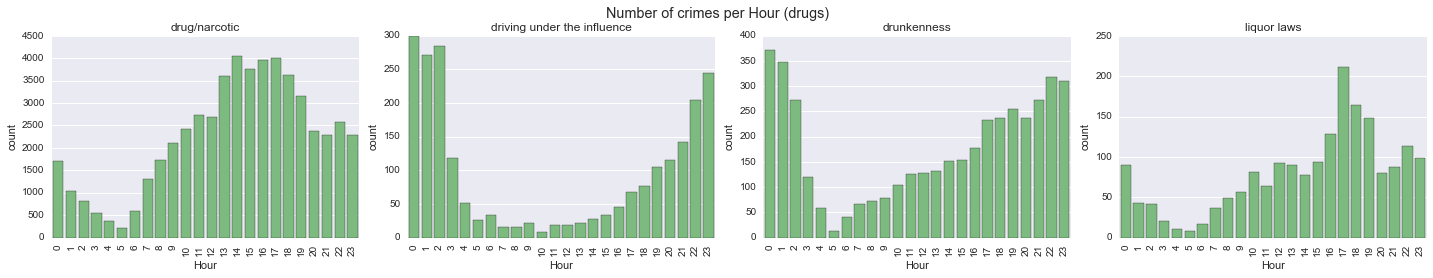

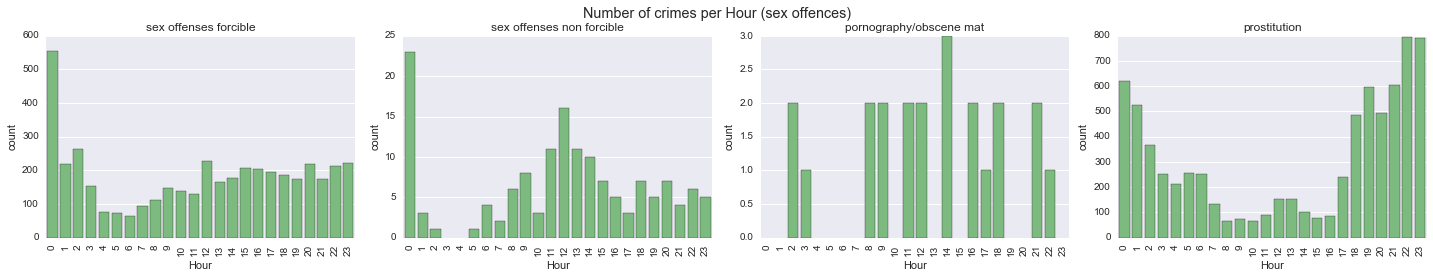

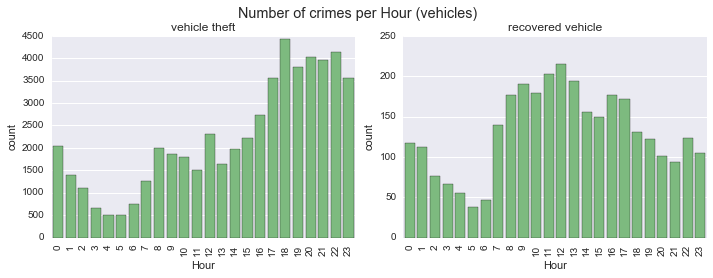

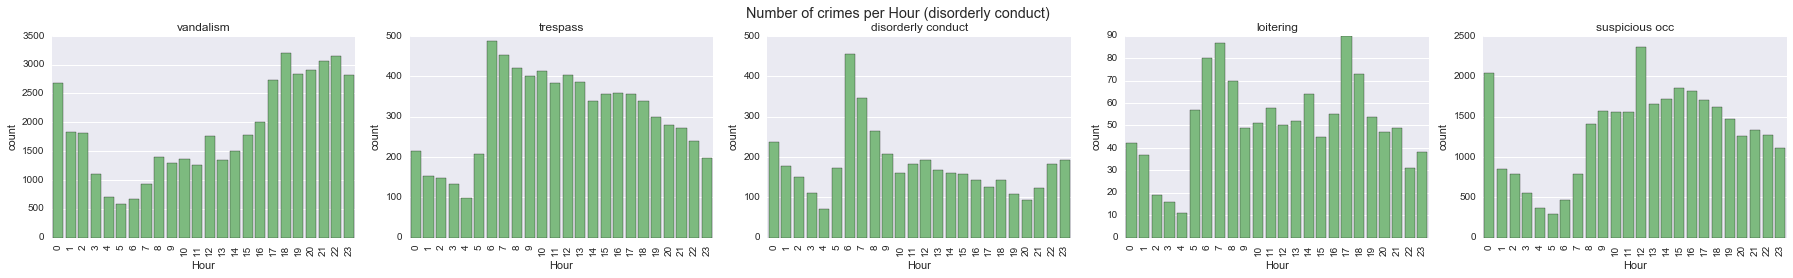

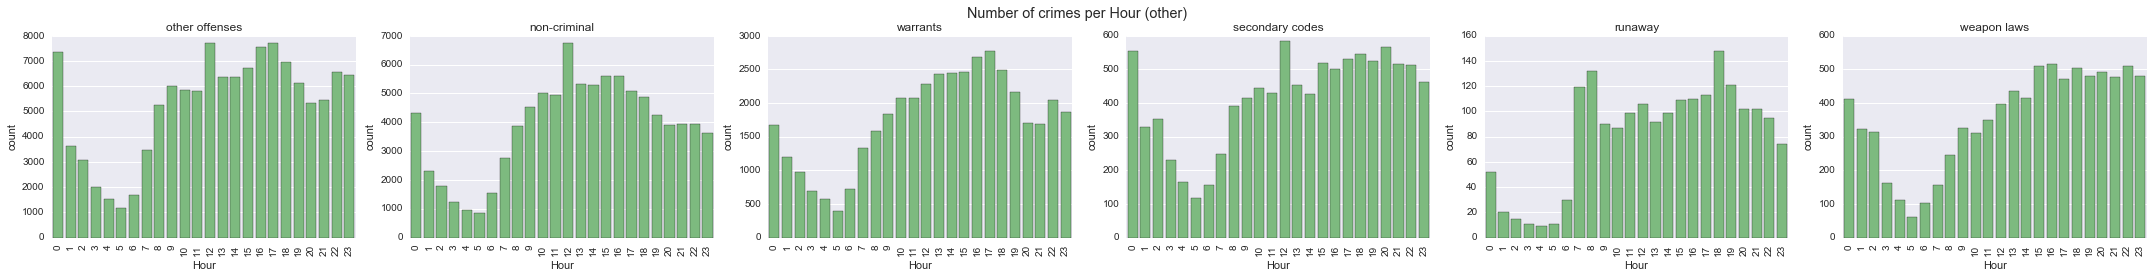

In [109]:
plot_count_of(categories, 'health danger', 'Hour', hours)
plot_count_of(categories, 'drugs', 'Hour', hours)
plot_count_of(categories, 'sex offences', 'Hour', hours)
plot_count_of(categories, 'vehicles', 'Hour', hours)
plot_count_of(categories, 'disorderly conduct', 'Hour', hours)
plot_count_of(categories, 'other', 'Hour', hours)


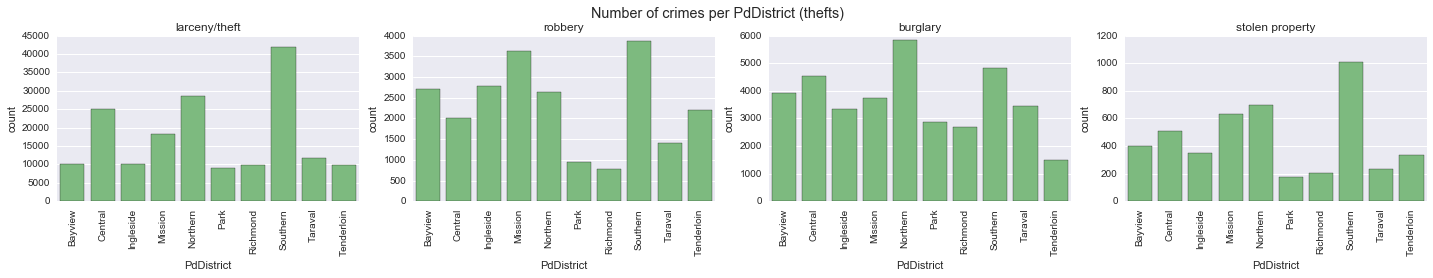

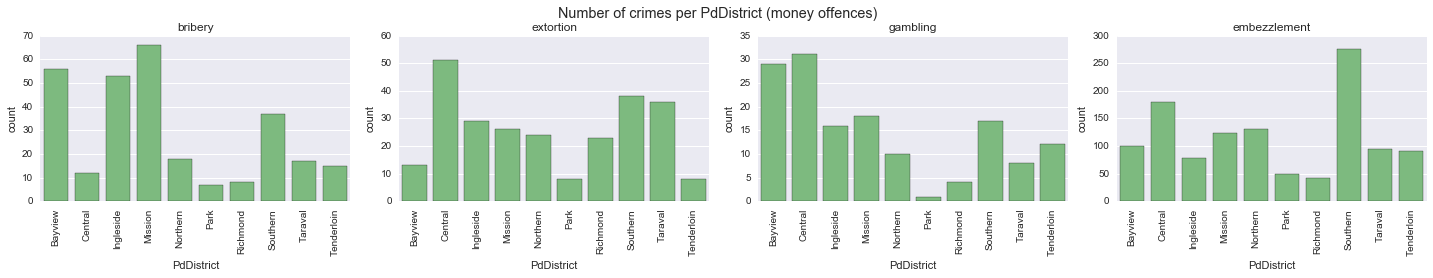

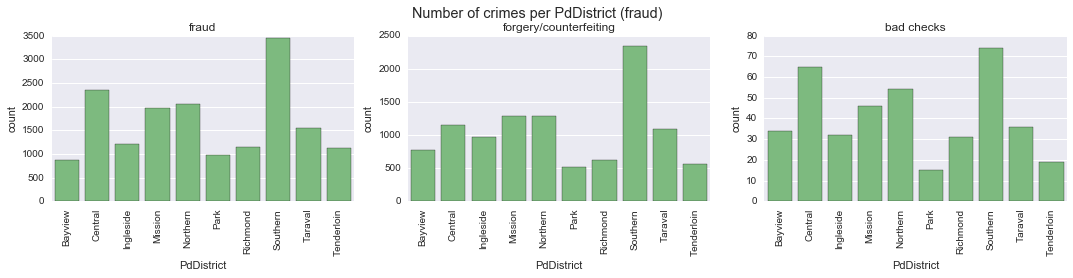

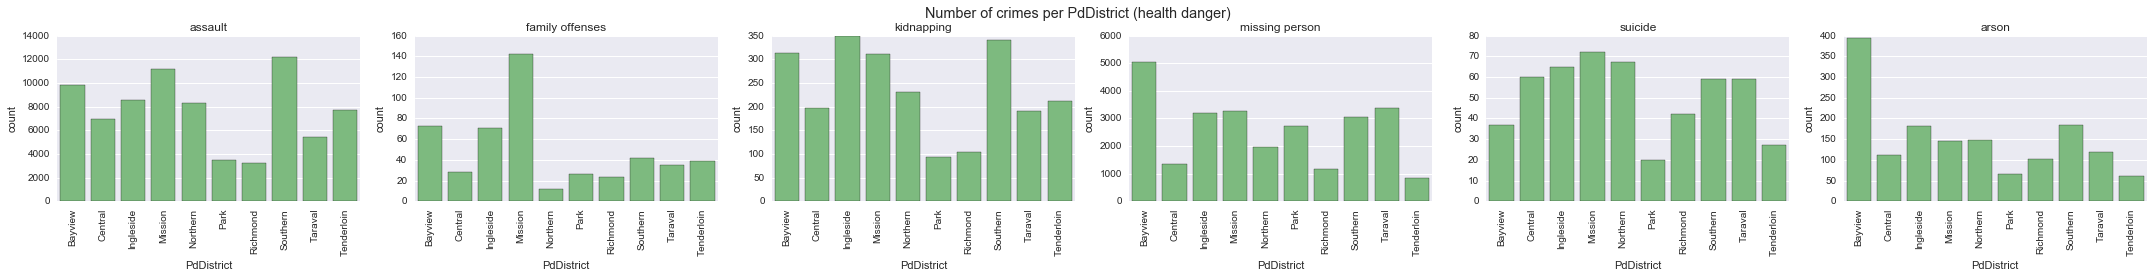

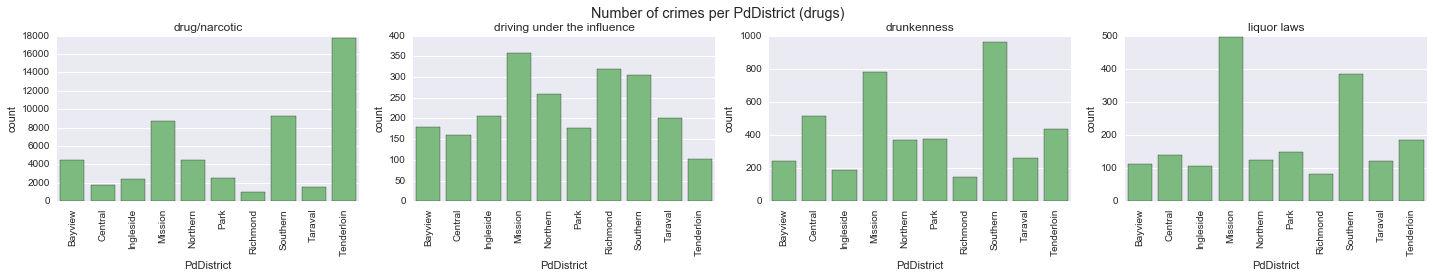

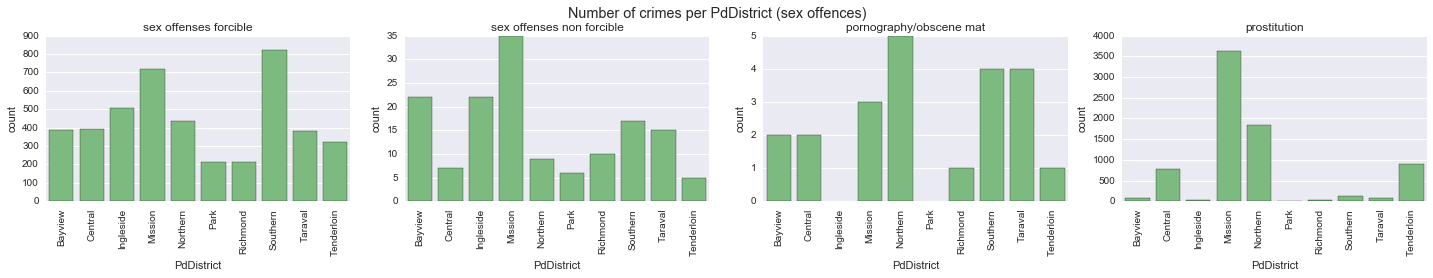

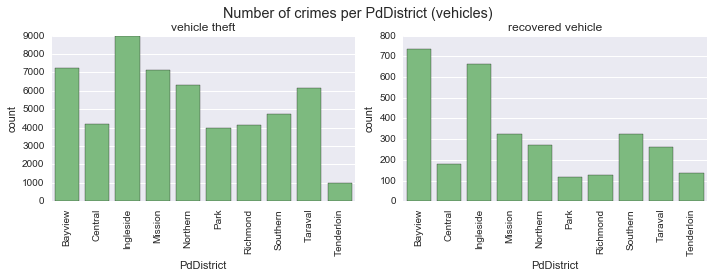

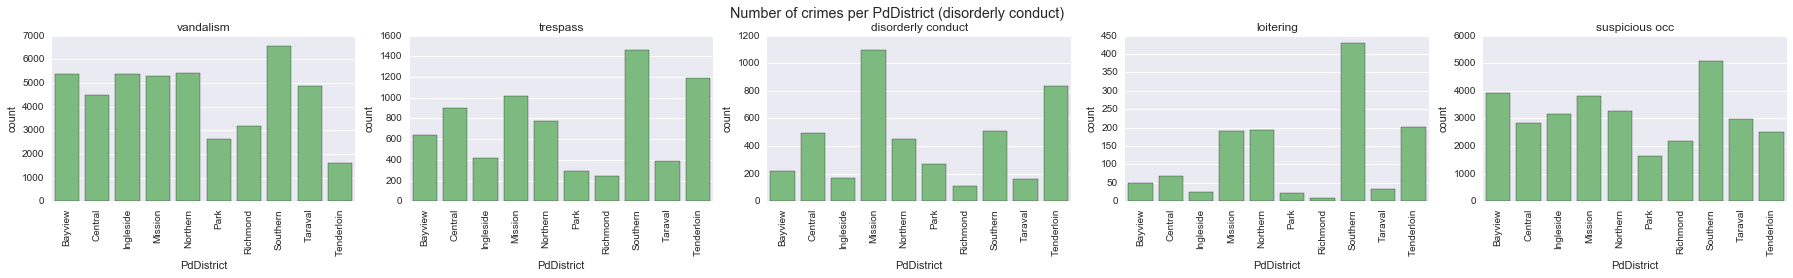

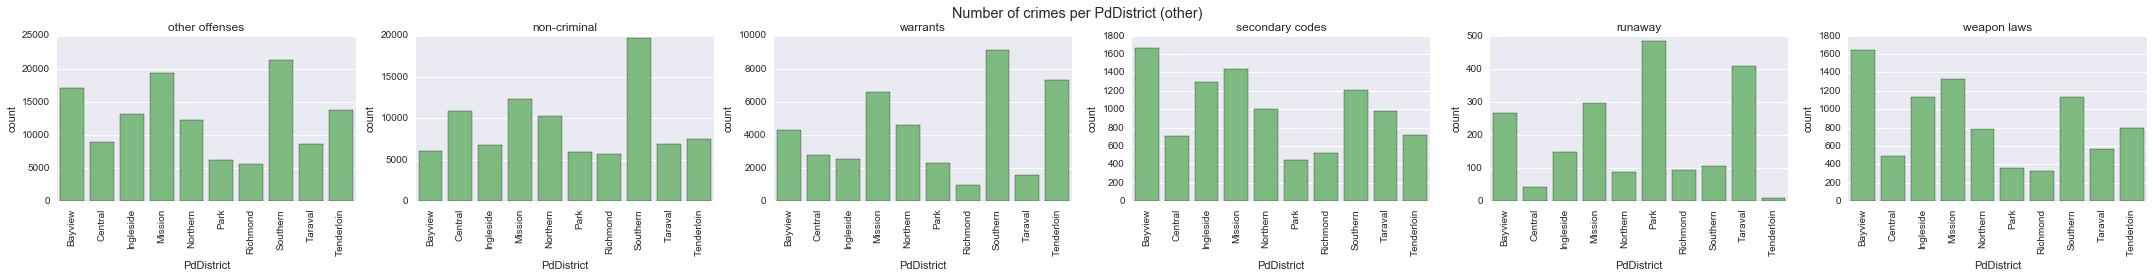

In [113]:
plot_count_of(categories, 'thefts', 'PdDistrict', districts)
plot_count_of(categories, 'money offences', 'PdDistrict', districts)
plot_count_of(categories, 'fraud', 'PdDistrict', districts)
plot_count_of(categories, 'health danger', 'PdDistrict', districts)
plot_count_of(categories, 'drugs', 'PdDistrict', districts)
plot_count_of(categories, 'sex offences', 'PdDistrict', districts)
plot_count_of(categories, 'vehicles', 'PdDistrict', districts)
plot_count_of(categories, 'disorderly conduct', 'PdDistrict', districts)
plot_count_of(categories, 'other', 'PdDistrict', districts)